# Research goals:

- What major factors contribute to student's exam performance?
- Are test results on writing, reading and maths correlated? If yes, how strongly?
- How are test results distributed based on race/ethnicicty, gender, parental level of education and other features?

The dataset of interest is taken from kaggle, https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data, a well structured, not very complex dataset which we aim to employ for analysis of student's performance in exams.
Unfortunately, we found out that it is syntetic, therefore we will use 2 datasets hereafter.


### 1. Data Cleaning and Pre-processing

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df2 = pd.read_csv('student_data.csv')
df2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df2['Grade'] = (df2['G1'] + df2['G2'] + df2['G3'])/3

In [9]:
df2 = df2.drop(['G1', 'G2', 'G3'], axis=1)

In [10]:
df2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,8.666667


In [11]:
# Renaming the column names for easy understanding
df.rename(columns={'race/ethnicity': 'ethncity',
                  'parental level of education': 'parent_education',
                  'test preparation course': 'test_preparation',
                  'math score': 'math_score',
                  'reading score': 'reading_score',
                  'writing score': 'writing_score'}, inplace=True)
df

,gender,ethncity,parent_education,lunch,test_preparation,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [12]:
df.info()   #checking for missing values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            1000 non-null   object
 1   ethncity          1000 non-null   object
 2   parent_education  1000 non-null   object
 3   lunch             1000 non-null   object
 4   test_preparation  1000 non-null   object
 5   math_score        1000 non-null   int64 
 6   reading_score     1000 non-null   int64 
 7   writing_score     1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset")

There are 1000 rows and 8 columns in the dataset


In [14]:
df.duplicated().sum()  #checking for duplicate values

0

In [15]:
df.describe()  #summary statistics

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


As there are no null, duplicate values as well as other data discrepancies, we proceed with the EDA.

### 2. Exploratory Data Analysis

First, we analyze the gender column:

In [16]:
df['gender'].value_counts()  #checking the distribution

gender
female    518
male      482
Name: count, dtype: int64

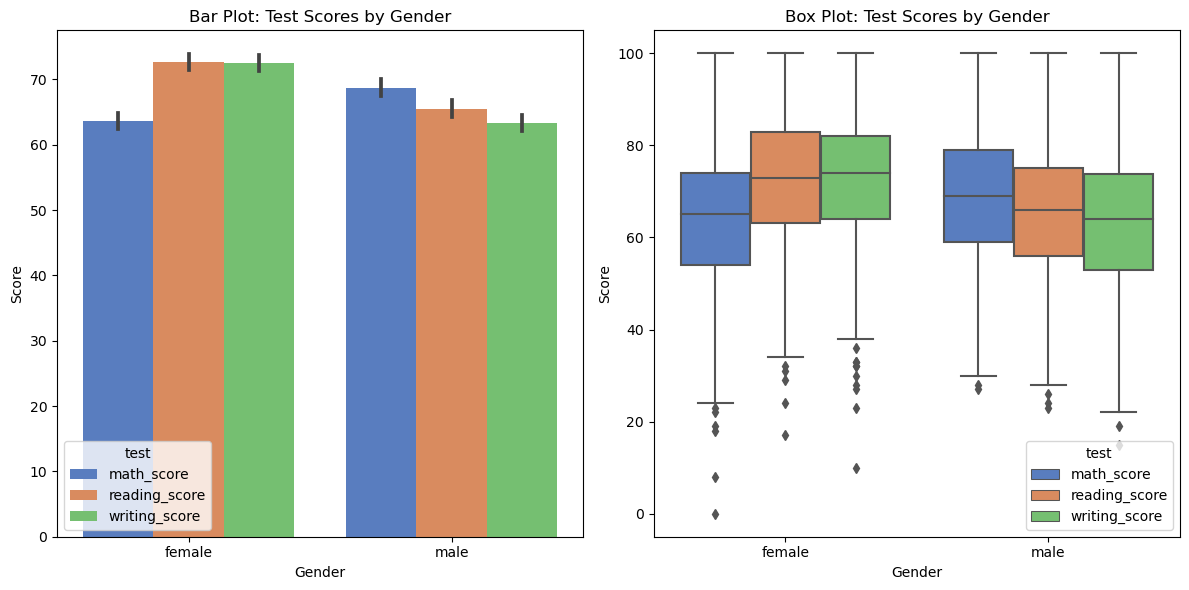

In [17]:
df_melted = df.drop(columns=['ethncity', 'parent_education', 'lunch', 'test_preparation']).melt(
    id_vars=['gender'], var_name='test', value_name='score')

plt.figure(figsize=(12, 6))

# Bar plot
plt.subplot(1, 2, 1)
sns.barplot(x='gender', y='score', hue='test', data=df_melted, palette='muted')
plt.xlabel('Gender')
plt.ylabel('Score')
plt.title('Bar Plot: Test Scores by Gender')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x='gender', y='score', hue='test', data=df_melted, palette='muted')
plt.xlabel('Gender')
plt.ylabel('Score')
plt.title('Box Plot: Test Scores by Gender')

plt.tight_layout()
plt.show()



# In this section, we will outline some of the key findings from the analysis of the dataset. To get a better understanding of the dataset, we plotted average scores for each test for both males and females.
# The bar plot and box plot show that generally males performed better in math tests and worse on 2 other tests. We used box plot to gain a better intuition on standard deviation, outliers and etc. Although there are clear outliers
# in the data set, we decided not to remove them as they are not errors but rather a legitimate part of the data. We will continue with the analysis of the dataset without removing the outliers.

We observe that girls, on average, tend to outperform boys in writing and reading, while boys are better in maths.

On the boxplot, we see a lot of "outliers", especially for girls, however, since we are in the context of test scores, low and extremely low scores are completely possible and should be considered valid for the analysis.

In [18]:
print('Mean scores for each test based on gender:')
df.groupby('gender')[['math_score', 'writing_score', 'reading_score']].mean()


Mean scores for each test based on gender:


,math_score,writing_score,reading_score
gender,,,
female,63.633205,72.467181,72.608108
male,68.728216,63.311203,65.473029


Next, we will go through the ethnicity column:

In [19]:
df['ethncity'].value_counts()  #checking the distribution

ethncity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

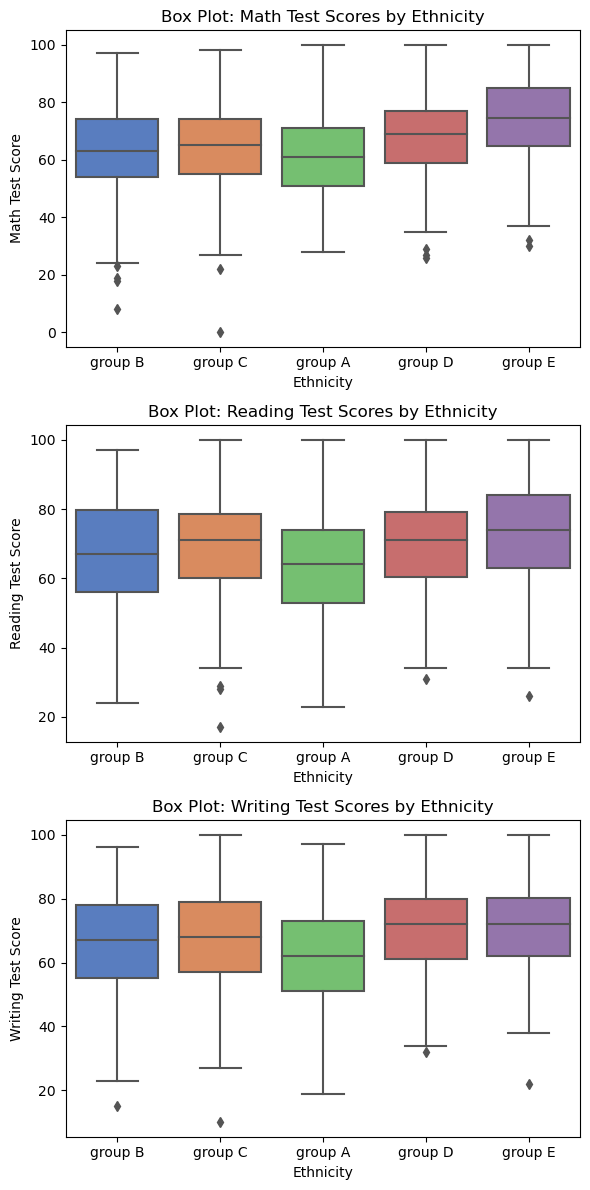

In [20]:
fig, axs = plt.subplots(3, 1, figsize=(6, 12))

# Create boxplots
sns.boxplot(x='ethncity', y='math_score', data=df, palette='muted', ax=axs[0])
axs[0].set_xlabel('Ethnicity')
axs[0].set_ylabel('Math Test Score')
axs[0].set_title('Box Plot: Math Test Scores by Ethnicity')

sns.boxplot(x='ethncity', y='reading_score', data=df, palette='muted', ax=axs[1])
axs[1].set_xlabel('Ethnicity')
axs[1].set_ylabel('Reading Test Score')
axs[1].set_title('Box Plot: Reading Test Scores by Ethnicity')

sns.boxplot(x='ethncity', y='writing_score', data=df, palette='muted', ax=axs[2])
axs[2].set_xlabel('Ethnicity')
axs[2].set_ylabel('Writing Test Score')
axs[2].set_title('Box Plot: Writing Test Scores by Ethnicity')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# This plot represents the distribution of test scores for each race. We can clearly outline that group E outperforms every other group in terms of average scores in all three tests. 
# Group A has the lowest average scores in all three tests.

Group A, on average has lower scores, while group E can be outlined for the best performance in tests. We do not have access to the exact specific ethicities the given groups refer to, therefore we just leave the labels as they were presented to us (A, B, C format).

The third variable we examine is parental education:

In [21]:
df['parent_education'].value_counts()  #checking the distribution

parent_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

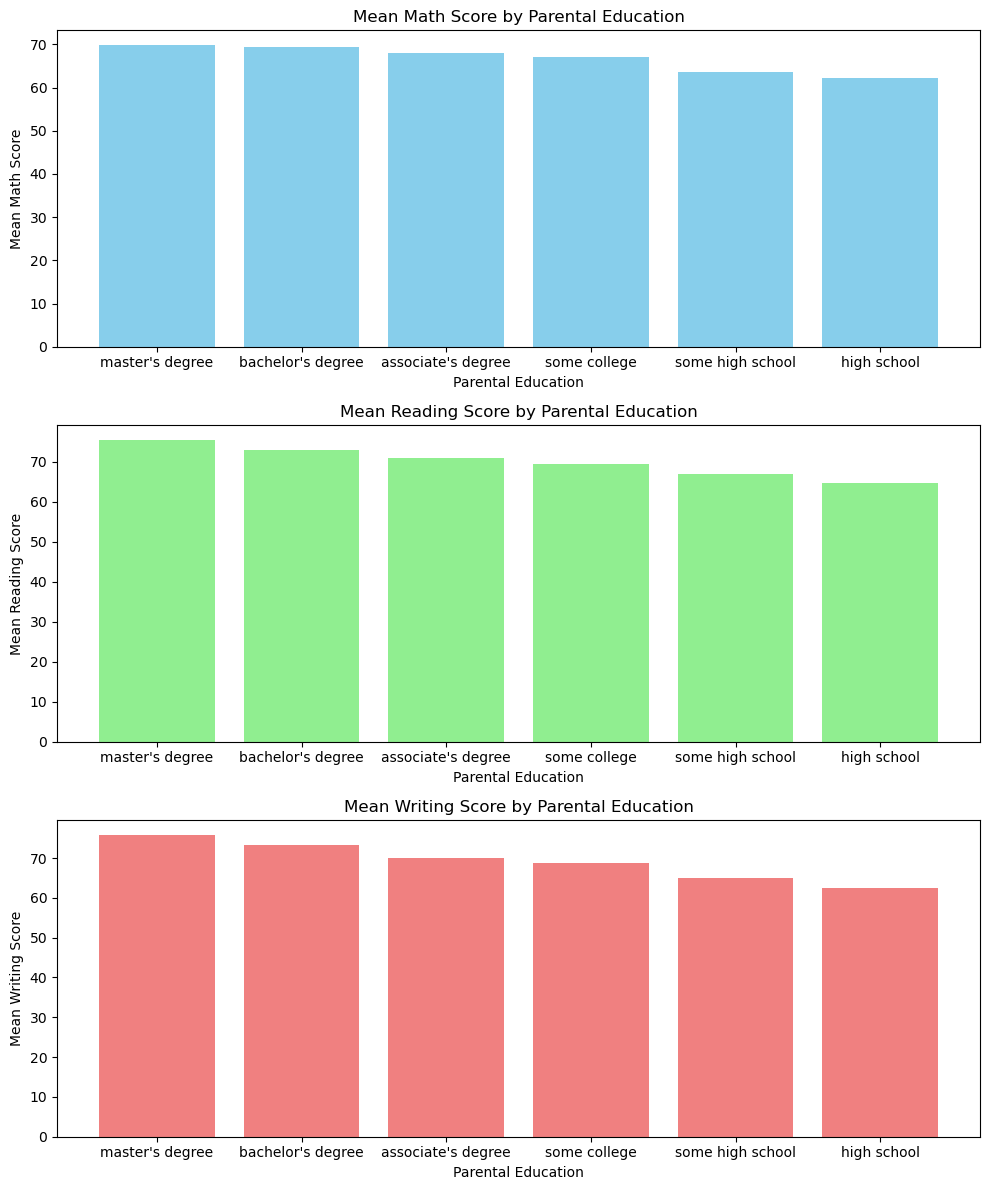

In [22]:
scores_parent = df.groupby('parent_education')[['math_score', 'reading_score', 'writing_score']].mean().sort_values(by='math_score', ascending=False)

fig, ax = plt.subplots(3, 1, figsize=(10, 12))
ax[0].bar(scores_parent.index, scores_parent['math_score'], color='skyblue')
ax[0].set_xlabel('Parental Education')
ax[0].set_ylabel('Mean Math Score')
ax[0].set_title('Mean Math Score by Parental Education')

ax[1].bar(scores_parent.index, scores_parent['reading_score'], color='lightgreen')
ax[1].set_xlabel('Parental Education')
ax[1].set_ylabel('Mean Reading Score')
ax[1].set_title('Mean Reading Score by Parental Education')

ax[2].bar(scores_parent.index, scores_parent['writing_score'], color='lightcoral')
ax[2].set_xlabel('Parental Education')
ax[2].set_ylabel('Mean Writing Score')
ax[2].set_title('Mean Writing Score by Parental Education')

plt.tight_layout()
plt.show()

# This plot represents the average scores for each test based on parental education. We can clearly outline that children of parents with a master's degree outperform every other group in terms of average scores in all three tests, although what would come across as unexpected is that children of parents who didn't finish high school outperformed children of parents with a high school degree in all three tests. 

We also observe that parental education is an important feature to consider when assessing the performance of kids. The higher the parental education, the higher the scores are for students. It is an interesting association which is logical, as parents with higher education are good exampleы for their kids, can help them with understanding the material and it might be something culturual in the family.

Then, we observe the 'lunch' variable, which is a binary feature representing whether the student receieves lunch allowance or not. In our opinion, this variable will have a high information gain due to the historical economics works where it was proved that income is highly positivily correlated with students' performance. Since 'lunch' variable correlates with income (higher income families do not receive subsidies, lower do), it is forecasted to pull the effect of income in determining the test scores.

In [23]:
df['lunch'].value_counts()  #checking the distribution

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

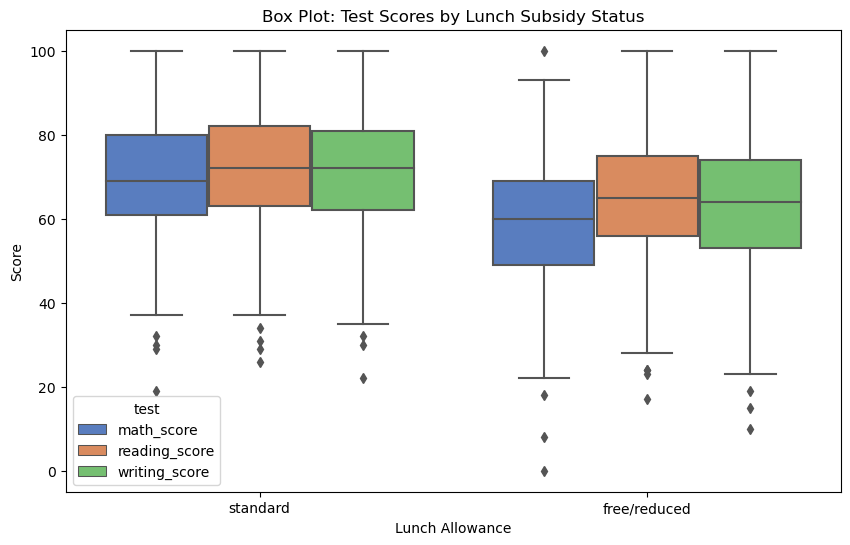

In [24]:
df_melted = df.drop(columns=['ethncity', 'parent_education', 'gender', 'test_preparation']).melt(
    id_vars=['lunch'], var_name='test', value_name='score')

plt.figure(figsize=(10, 6))
sns.boxplot(x='lunch', y='score', hue='test', data=df_melted, palette='muted')
plt.xlabel('Lunch Allowance')
plt.ylabel('Score')
plt.title('Box Plot: Test Scores by Lunch Subsidy Status')
plt.show()
# This plot represents the distribution of test scores for each lunch allowance,which is a binary feature representing whether the student receieves lunch allowance or not. Unexpectedly, lunch has had the biggest impact on the test results so far. That is due to the fact that it also serves as a proxy for socio-economic status. Therefore, it means that in the dataset it also represents omitted variables that cause students to have a possibility to afford a standart lunch and therefore also afford private tutoring, access to better tools and etc.

It is clear that students with standard lunch allowance status significantly outperform students who receive lunch subsidies. It is, as noted before, explained by the fact that income, which is highly correlated with students' performance is correlated with lunch allowance status of students.

The last categorical variable we have for analysis is 'test_preparation' which refers to students attending the preparatory course for the test.

In [25]:
df['test_preparation'].value_counts()  #checking the distribution

test_preparation
none         642
completed    358
Name: count, dtype: int64

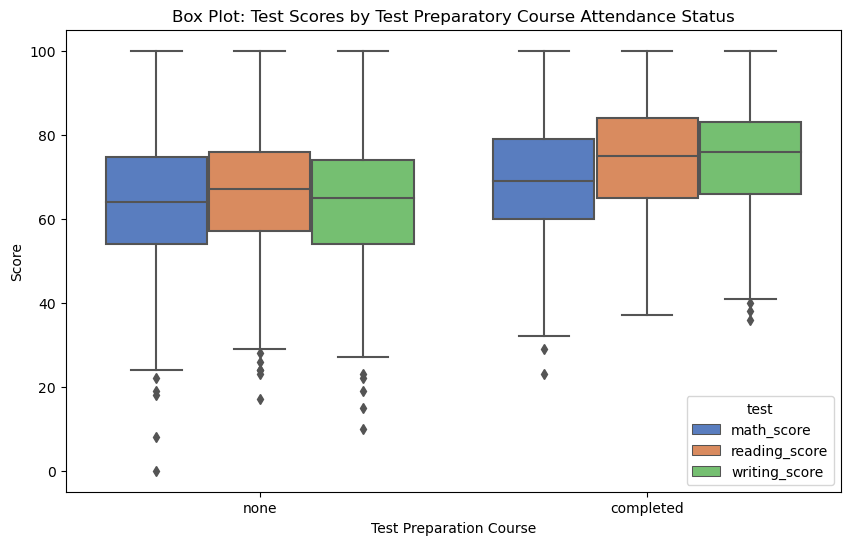

In [26]:
df_melted = df.drop(columns=['ethncity', 'parent_education', 'gender', 'lunch']).melt(
    id_vars=['test_preparation'], var_name='test', value_name='score')

plt.figure(figsize=(10, 6))
sns.boxplot(x='test_preparation', y='score', hue='test', data=df_melted, palette='muted')
plt.xlabel('Test Preparation Course')
plt.ylabel('Score')
plt.title('Box Plot: Test Scores by Test Preparatory Course Attendance Status')
plt.show()
# This plot represents average scores for each test based on whether the student attended a test preparatory course or not. It is clear that students who attended the course outperformed those who didn't by 10 points on average in all three tests. This is expected as the course is designed to help students prepare for the test.

It is pretty logical that students who have attended preparatory courses, perform better in tests rather than students who haven't. Moreover, this variable tends to be correlated with things such as students' motivation, time availability, etc. which are also associated with test scores.

Coming to numerical variables, we have: math_score, writing_score, reading_score which refer to scores for given test types.

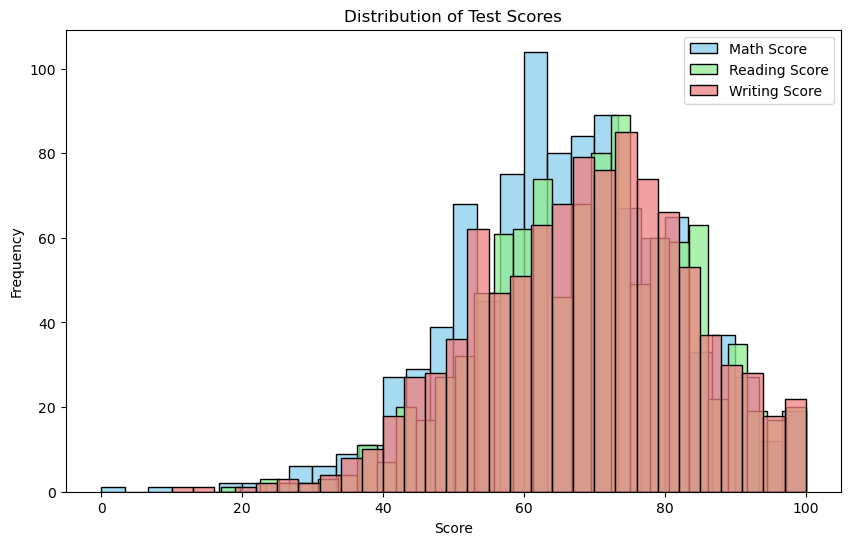

In [31]:
plt.figure(figsize=(10, 6))

# Plot the histograms
sns.histplot(data=df, x='math_score', bins=30, color='skyblue', edgecolor='black', label='Math Score')
sns.histplot(data=df, x='reading_score', bins=30, color='lightgreen', edgecolor='black', label='Reading Score')
sns.histplot(data=df, x='writing_score', bins=30, color='lightcoral', edgecolor='black', label='Writing Score')

# Add labels and title
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Test Scores')
plt.legend()

# Show plot
plt.show()
# This plot represents the distribution of test scores for each test. We can clearly outline that the distribution of scores for each test is approximately normal. The distribution of scores for the reading and writing tests are almost identical, while the distribution of scores for the math test is slightly skewed to the right.

Mean: 66.09
Standard Deviation: 15.16
Shapiro-Wilk Statistic: 0.99
P-value: 0.000145


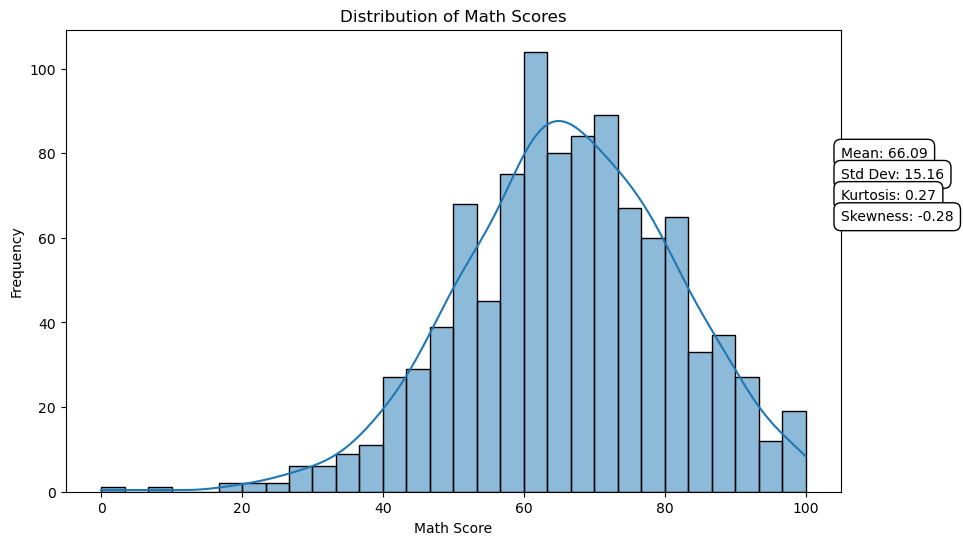

Shapiro-Wilk Test:
Test Statistic: 0.9931
P-value: 0.0001


In [32]:
from scipy.stats import norm, shapiro
# Fit a normal distribution
mu = df['math_score'].mean()
sigma = df['math_score'].std()

# Run Shapiro-Wilk test
shapiro_statistic, p_value = shapiro(df['math_score'])

# Print results
print(f"Mean: {mu:.2f}")
print(f"Standard Deviation: {sigma:.2f}")
print(f"Shapiro-Wilk Statistic: {shapiro_statistic:.2f}")
print(f"P-value: {p_value:.6f}")
math_stats = df['math_score'].describe()
mean = math_stats['mean']
std_dev = math_stats['std']
kurtosis = df['math_score'].kurtosis()
skewness = df['math_score'].skew()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='math_score', bins=30, edgecolor='black', kde=True)

# Annotate with statistics
plt.text(105, 80, f'Mean: {mean:.2f}', va='center', ha='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.text(105, 75, f'Std Dev: {std_dev:.2f}', va='center', ha='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.text(105, 70, f'Kurtosis: {kurtosis:.2f}', va='center', ha='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.text(105, 65, f'Skewness: {skewness:.2f}', va='center', ha='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Add labels and title
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.title('Distribution of Math Scores')

# Show plot
plt.show()
mu = df['math_score'].mean()
sigma = df['math_score'].std()

# Run Shapiro-Wilk test
shapiro_statistic, p_value = shapiro(df['math_score'])
print("Shapiro-Wilk Test:")
print(f"Test Statistic: {shapiro_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

Shapiro-Wilk Test:
Test Statistic: 0.9929
P-value: 0.0001


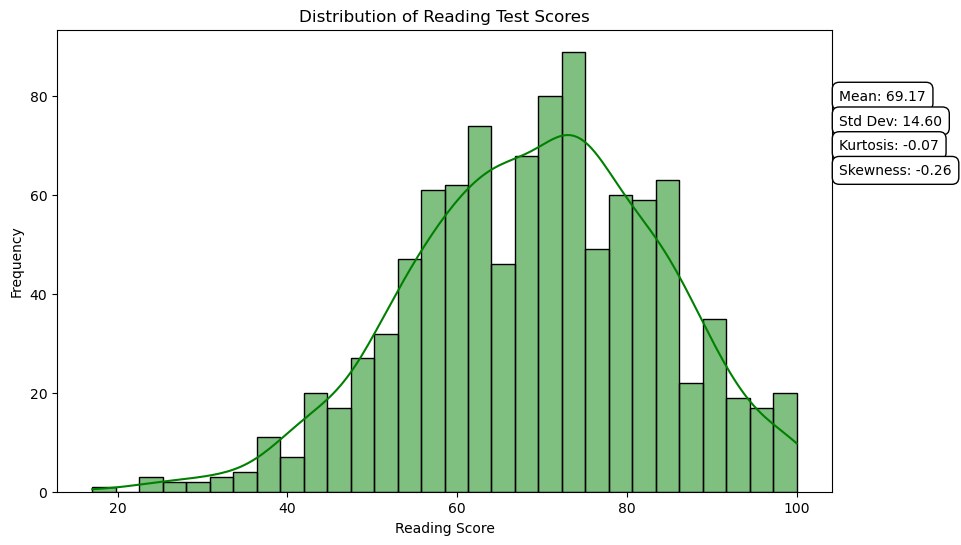

In [33]:
from scipy.stats import shapiro

# Fit a normal distribution
mu = df['reading_score'].mean()
sigma = df['reading_score'].std()

# Run Shapiro-Wilk test
shapiro_statistic, p_value = shapiro(df['reading_score'])

print("Shapiro-Wilk Test:")
print(f"Test Statistic: {shapiro_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
# Calculate statistics
reading_stats = df['reading_score'].describe()
mean = reading_stats['mean']
std_dev = reading_stats['std']
kurtosis = df['reading_score'].kurtosis()
skewness = df['reading_score'].skew()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='reading_score', bins=30, edgecolor='black', kde=True, color = 'green')

# Annotate with statistics
plt.text(105, 80, f'Mean: {mean:.2f}', va='center', ha='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.text(105, 75, f'Std Dev: {std_dev:.2f}', va='center', ha='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.text(105, 70, f'Kurtosis: {kurtosis:.2f}', va='center', ha='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.text(105, 65, f'Skewness: {skewness:.2f}', va='center', ha='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Add labels and title
plt.xlabel('Reading Score')
plt.ylabel('Frequency')
plt.title('Distribution of Reading Test Scores')

# Show plot
plt.show()

Mean: 68.05
Standard Deviation: 15.19
Shapiro-Wilk Statistic: 0.99
P-value: 0.00
Mean: 68.05
Standard Deviation: 15.19
P-value: 0.00


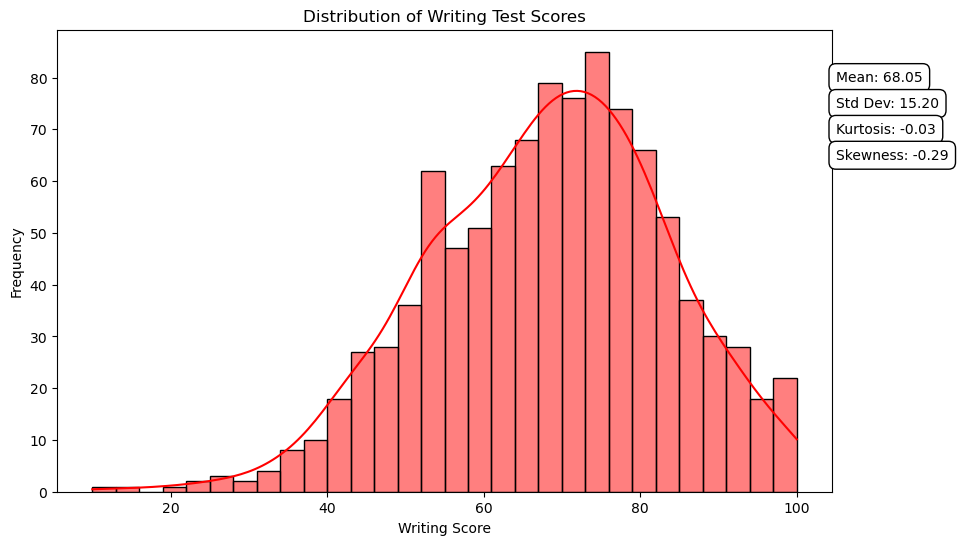

Shapiro-Wilk Test:
Test Statistic: 0.9920
P-value: 0.0000


In [34]:
from scipy.stats import kstest, norm
# Fit a normal distribution to the data
mu, sigma = norm.fit(df['writing_score'])

# Perform the Shapiro-Wilk test
shapiro_statistic, p_value = stats.shapiro(df['writing_score'])

# Print the results
print(f"Mean: {mu:.2f}")
print(f"Standard Deviation: {sigma:.2f}")
print(f"Shapiro-Wilk Statistic: {shapiro_statistic:.2f}")
print(f"P-value: {p_value:.2f}")

# Fit a normal distribution to the data
mu, sigma = norm.fit(df['writing_score'])

# Perform the Kolmogorov-Smirnov test

# Print the results
print(f"Mean: {mu:.2f}")
print(f"Standard Deviation: {sigma:.2f}")
print(f"P-value: {p_value:.2f}")
# Calculate statistics
writing_stats = df['writing_score'].describe()
mean = writing_stats['mean']
std_dev = writing_stats['std']
kurtosis = df['writing_score'].kurtosis()
skewness = df['writing_score'].skew()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='writing_score', bins=30, edgecolor='black', kde=True, color = 'red')

# Annotate with statistics
plt.text(105, 80, f'Mean: {mean:.2f}', va='center', ha='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.text(105, 75, f'Std Dev: {std_dev:.2f}', va='center', ha='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.text(105, 70, f'Kurtosis: {kurtosis:.2f}', va='center', ha='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.text(105, 65, f'Skewness: {skewness:.2f}', va='center', ha='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Add labels and title
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.title('Distribution of Writing Test Scores')

# Show plot
plt.show()
mu = df['writing_score'].mean()
sigma = df['writing_score'].std()

# Run Shapiro-Wilk test
shapiro_statistic, p_value = shapiro(df['writing_score'])
print("Shapiro-Wilk Test:")
print(f"Test Statistic: {shapiro_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

All the distributions have a negative skew, meaning that lower scores are less probable but there is a high distinct amount of them.

As to kurtosis, it varies, sometimes tails are longer than in normal, sometimes not.

We try to fit normal and t-distributions for test scores:

Mean and standard deviations of scores are pretty similar, almost the same.

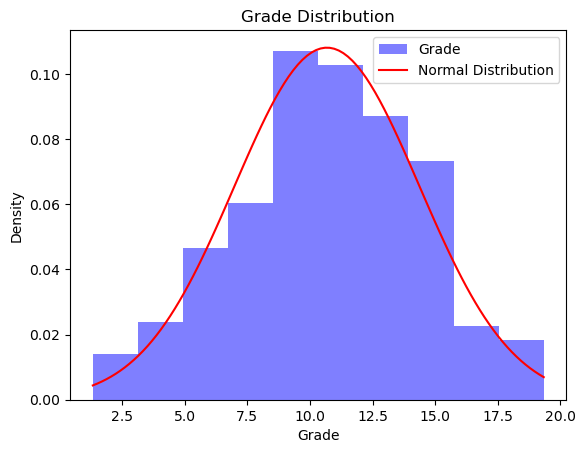

In [35]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Plot the histogram
plt.hist(df2['Grade'], bins=10, density=True, alpha=0.5, color='blue', label='Grade')

# Fit a normal distribution to the data
mu, sigma = stats.norm.fit(df2['Grade'])
x = np.linspace(df2['Grade'].min(), df2['Grade'].max(), 100)
y = stats.norm.pdf(x, mu, sigma)

# Plot the normal distribution
plt.plot(x, y, color='red', label='Normal Distribution')

# Set the plot title and labels
plt.title('Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Density')

# Show the legend
plt.legend()

# Show the plot
plt.show()

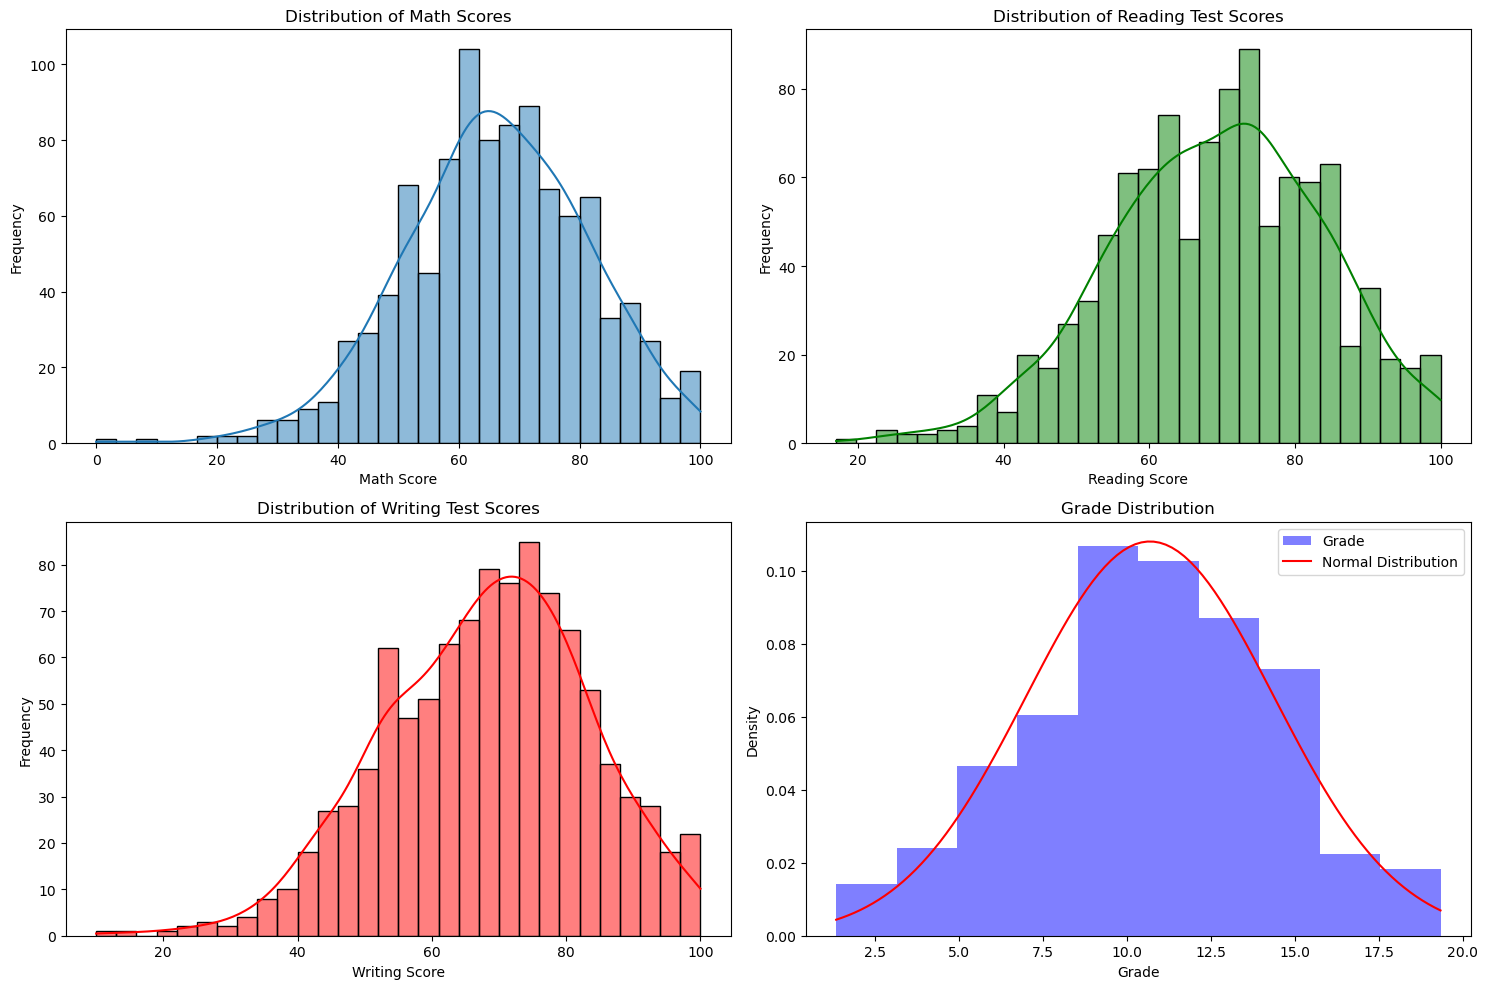

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Math Score Distribution
sns.histplot(data=df, x='math_score', bins=30, edgecolor='black', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Math Scores')
axes[0, 0].set_xlabel('Math Score')
axes[0, 0].set_ylabel('Frequency')

# Plot 2: Reading Score Distribution
sns.histplot(data=df, x='reading_score', bins=30, edgecolor='black', kde=True, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Reading Test Scores')
axes[0, 1].set_xlabel('Reading Score')
axes[0, 1].set_ylabel('Frequency')

# Plot 3: Writing Score Distribution
sns.histplot(data=df, x='writing_score', bins=30, edgecolor='black', kde=True, color='red', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Writing Test Scores')
axes[1, 0].set_xlabel('Writing Score')
axes[1, 0].set_ylabel('Frequency')

# Plot 4: Grade Distribution
axes[1, 1].hist(df2['Grade'], bins=10, density=True, alpha=0.5, color='blue', label='Grade')
mu, sigma = stats.norm.fit(df2['Grade'])
x = np.linspace(df2['Grade'].min(), df2['Grade'].max(), 100)
y = stats.norm.pdf(x, mu, sigma)
axes[1, 1].plot(x, y, color='red', label='Normal Distribution')
axes[1, 1].set_title('Grade Distribution')
axes[1, 1].set_xlabel('Grade')
axes[1, 1].set_ylabel('Density')
axes[1, 1].legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [37]:
from scipy.stats import kstest, norm

# Perform Kolmogorov-Smirnov test on 'Grade' variable
ks_statistic, p_value = kstest(df2['Grade'], 'norm')

# Print the results
print("Kolmogorov-Smirnov Test:")
print("Test Statistic:", ks_statistic)
print("p-value:", p_value)


Kolmogorov-Smirnov Test:
Test Statistic: 0.9775264435232535
p-value: 0.0


In [38]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test on the test set predictions
statistic, p_value = shapiro(df2['Grade'])

# Print the results
print("Shapiro-Wilk Test (Test Set):")
print("Test Statistic:", statistic)
print("p-value:", p_value)


Shapiro-Wilk Test (Test Set):
Test Statistic: 0.9926785826683044
p-value: 0.05050148069858551


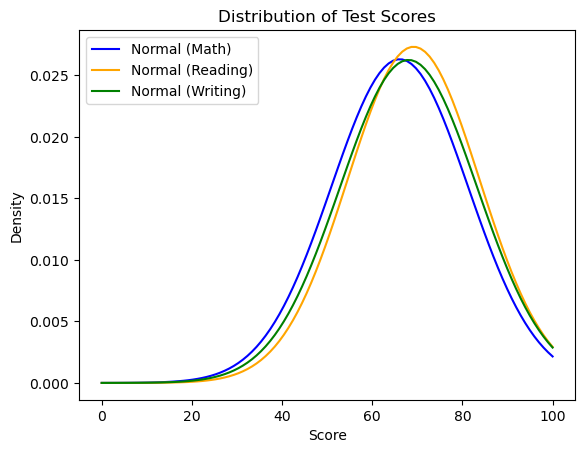

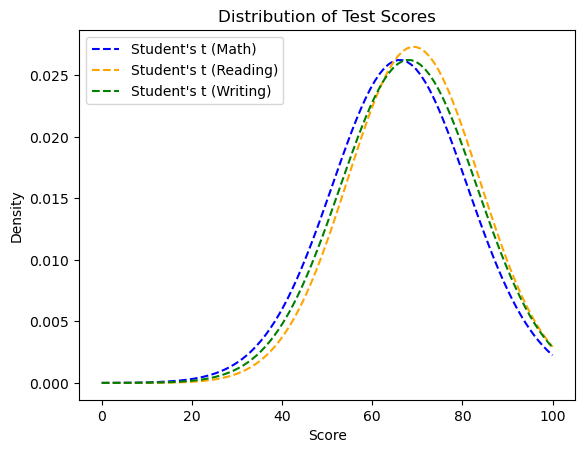

In [39]:
math_scores = df['math_score']
reading_scores = df['reading_score']
writing_scores = df['writing_score']

# Fit a normal distribution to the test scores using maximum likelihood estimation (MLE)
params_norm_math = stats.norm.fit(math_scores)
params_norm_reading = stats.norm.fit(reading_scores)
params_norm_writing = stats.norm.fit(writing_scores)

# Fit a Student's t distribution to the test scores using maximum likelihood estimation (MLE)
params_t_math = stats.t.fit(math_scores)
params_t_reading = stats.t.fit(reading_scores)
params_t_writing = stats.t.fit(writing_scores)

# Plot fitted normal distributions
x = np.linspace(math_scores.min(), math_scores.max(), 100)
plt.plot(x, stats.norm.pdf(x, *params_norm_math), label='Normal (Math)', color='blue')
plt.plot(x, stats.norm.pdf(x, *params_norm_reading), label='Normal (Reading)', color='orange')
plt.plot(x, stats.norm.pdf(x, *params_norm_writing), label='Normal (Writing)', color='green')

plt.title('Distribution of Test Scores')
plt.xlabel('Score')
plt.ylabel('Density')
plt.legend()
plt.show()

# Plot fitted Student's t distributions
plt.plot(x, stats.t.pdf(x, *params_t_math), linestyle='--', label="Student's t (Math)", color='blue')
plt.plot(x, stats.t.pdf(x, *params_t_reading), linestyle='--', label="Student's t (Reading)", color='orange')
plt.plot(x, stats.t.pdf(x, *params_t_writing), linestyle='--', label="Student's t (Writing)", color='green')

plt.title('Distribution of Test Scores')
plt.xlabel('Score')
plt.ylabel('Density')
plt.legend()
plt.show()

In [40]:
df[['math_score', 'reading_score', 'writing_score']].describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


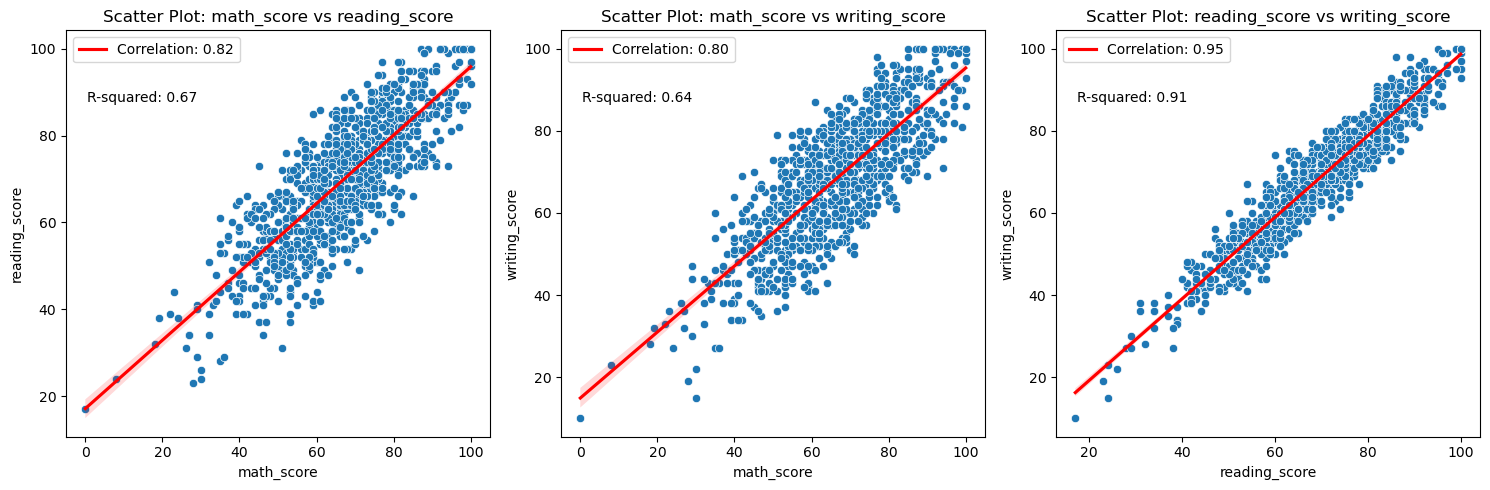

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
combinations = [('math_score', 'reading_score'), ('math_score', 'writing_score'), ('reading_score', 'writing_score')]
for ax, (x_col, y_col) in zip(axs, combinations):
    # Scatter plot
    sns.scatterplot(data=df, x=x_col, y=y_col, ax=ax)
    
    # Fit a straight line
    sns.regplot(data=df, x=x_col, y=y_col, scatter=False, ax=ax, color='red', label=f'Correlation: {stats.pearsonr(df[x_col], df[y_col])[0]:.2f}')
    
    # Calculate R-squared
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[x_col], df[y_col])
    r_squared = r_value ** 2
    
    # Add R-squared value to the plot
    ax.text(0.05, 0.85, f'R-squared: {r_squared:.2f}', transform=ax.transAxes, fontsize=10, verticalalignment='top')
    
    # Set labels and title
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f'Scatter Plot: {x_col} vs {y_col}')
    
    # Add legend
    ax.legend()
    
plt.tight_layout()
plt.show()


Based on the scatter plots, we note that linear correlations between test scores are significant. While correlation between math scores and reading or writing test scores is 0.80-0.82, correlation between writing and reading tests is very high.

It makes sense beacuse maths is a quantitative subject, which is on average less frequent in terms of interest and knowledge amongst students. 

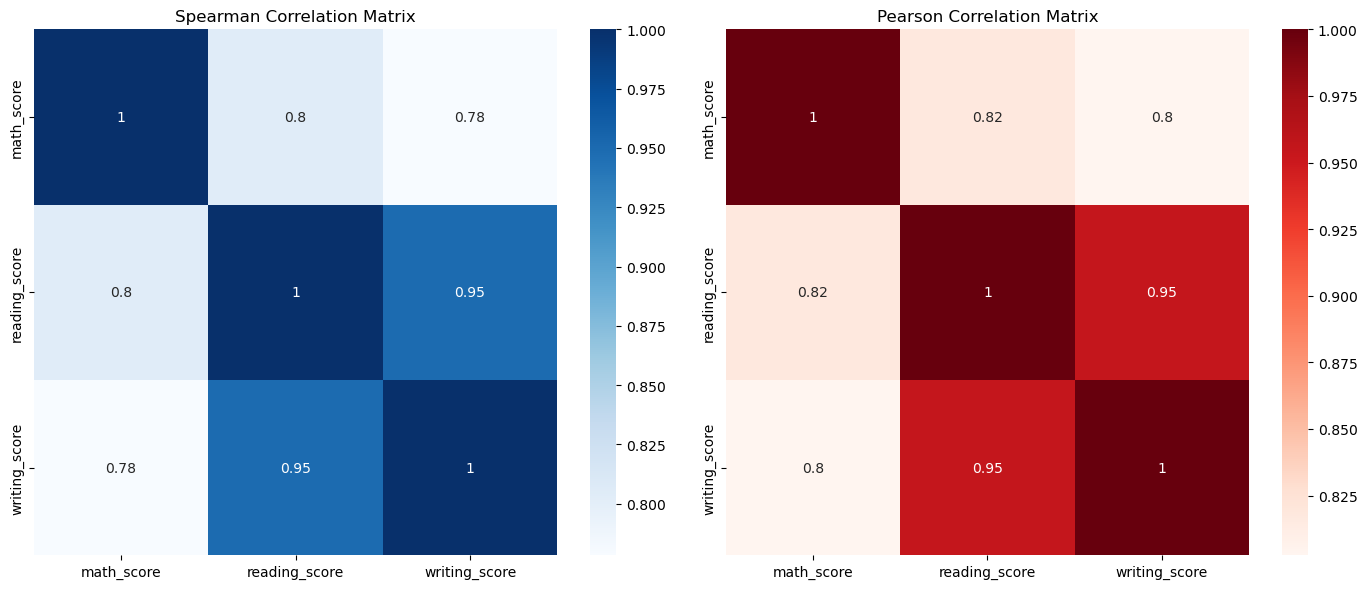

In [ ]:
# Calculate Spearman correlation matrix
spearman_corr = df[['math_score', 'reading_score', 'writing_score']].corr(method='spearman')

# Calculate Pearson correlation matrix
pearson_corr = df[['math_score', 'reading_score', 'writing_score']].corr()

# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot Spearman correlation matrix
sns.heatmap(spearman_corr, annot=True, cmap='Blues', cbar=True, ax=axs[0])
axs[0].set_title('Spearman Correlation Matrix')

# Plot Pearson correlation matrix
sns.heatmap(pearson_corr, annot=True, cmap='Reds', cbar=True, ax=axs[1])
axs[1].set_title('Pearson Correlation Matrix')

plt.tight_layout()
plt.show()
# All correlation are positive and strong. We also tested the correlation using Spearman's rank correlation coefficient and the results were consistent with the Pearson correlation coefficient. Both tests were statistically significant on 1 and 5 percent level.

Based on the correlation heatmaps we can conclude that there is a high significant both linear and nonlinear relationship between test scores.

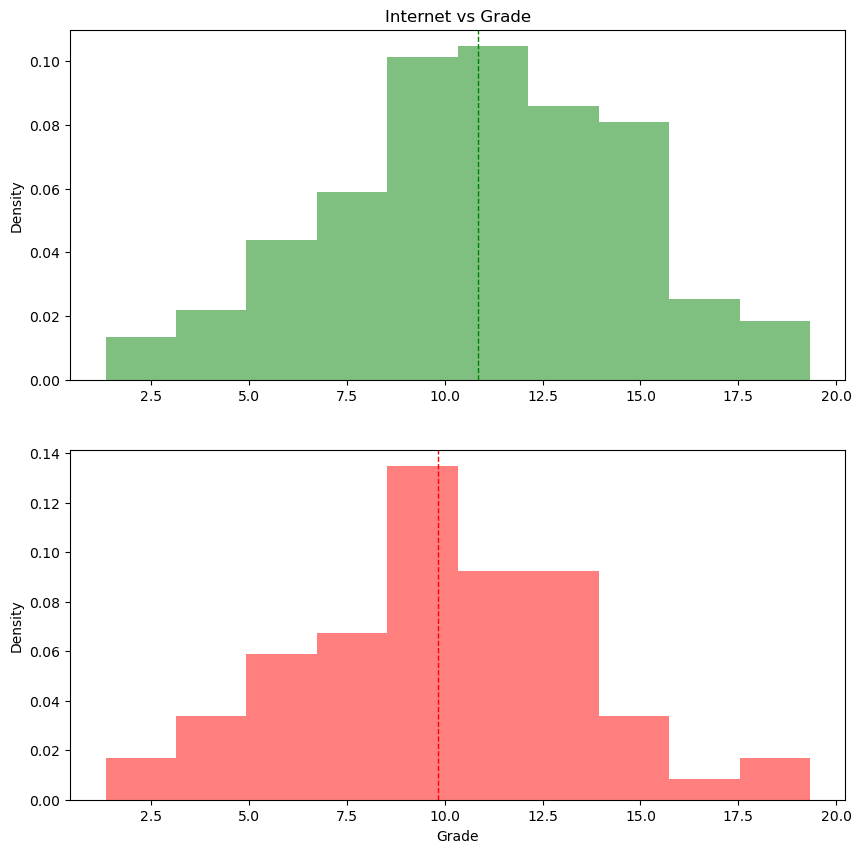

In [ ]:
bins = np.linspace(min(df2['Grade']), max(df2['Grade']), 11)
fig, ax = plt.subplots(2,1, figsize=(10,10))

ax[0].hist(df2[df2.internet == 'yes'].Grade, bins=bins, alpha=0.5, label='Internet',color = 'g',density = True)
ax[0].axvline(df2[df2.internet == 'yes'].Grade.mean(), color='g', linestyle='dashed', linewidth=1)
ax[1].hist(df2[df2.internet == 'no'].Grade, bins=bins, alpha=0.5, label='No Internet',color = 'r',density = True)
ax[1].axvline(df2[df2.internet == 'no'].Grade.mean(), color='r', linestyle='dashed', linewidth=1)
ax[1].set_xlabel('Grade')
ax[0].set_title('Internet vs Grade'); ax[1].set_ylabel('Density'); ax[0].set_ylabel('Density')
plt.show()

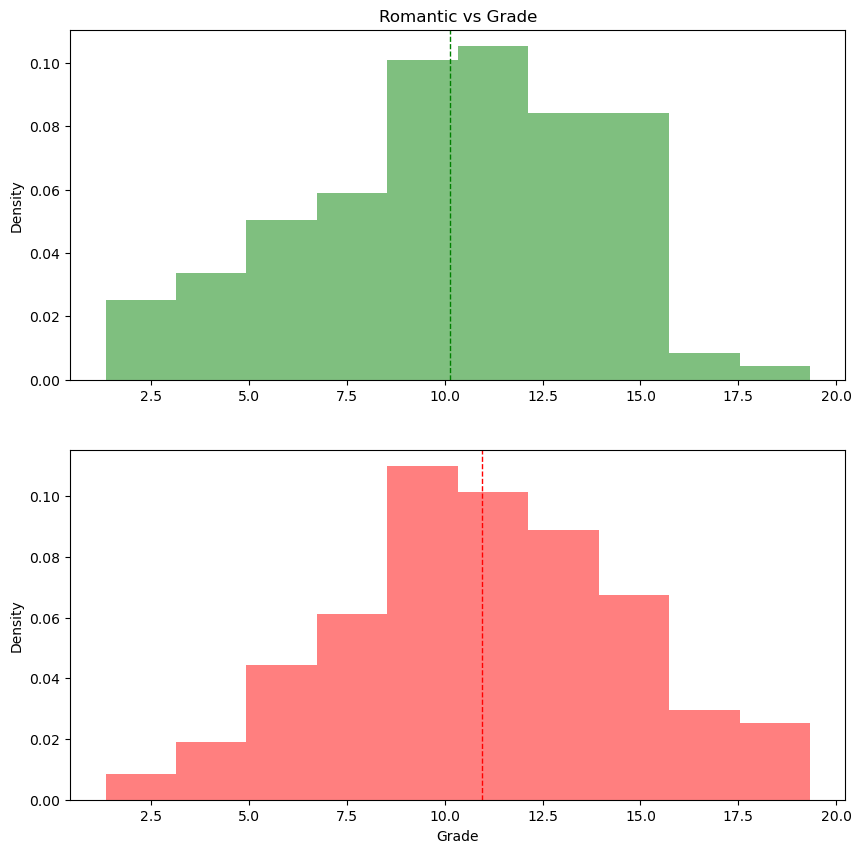

In [ ]:
bins = np.linspace(min(df2['Grade']), max(df2['Grade']), 11)
fig, ax = plt.subplots(2,1, figsize=(10,10))

ax[0].hist(df2[df2.romantic == 'yes'].Grade, bins=bins, alpha=0.5, label='Romantic Relations',color = 'g',density = True)
ax[0].axvline(df2[df2.romantic == 'yes'].Grade.mean(), color='g', linestyle='dashed', linewidth=1)
ax[1].hist(df2[df2.romantic == 'no'].Grade, bins=bins, alpha=0.5, label='Romantic Relations',color = 'r',density = True)
ax[1].axvline(df2[df2.romantic == 'no'].Grade.mean(), color='r', linestyle='dashed', linewidth=1)
ax[1].set_xlabel('Grade')
ax[0].set_title('Romantic vs Grade'); ax[1].set_ylabel('Density'); ax[0].set_ylabel('Density')
plt.show()

In [ ]:
stats.ttest_ind(df2[df2.romantic == 'yes'].Grade, df2[df2.romantic == 'no'].Grade, equal_var = False)

TtestResult(statistic=-2.0439114822017004, pvalue=0.041965111150106205, df=261.249873225931)

In [ ]:
stats.ttest_ind(df2[df2.internet == 'yes'].Grade, df2[df2.internet == 'no'].Grade, equal_var=False)

TtestResult(statistic=2.1027435949194566, pvalue=0.03811743647022728, df=95.52440308821478)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
    if df2[column].dtype == 'object':
        df2[column] = le.fit_transform(df2[column])

In [ ]:
df2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Grade
0,0,0,18,1,0,0,4,4,0,4,...,0,0,4,3,4,1,1,3,6,5.666667
1,0,0,17,1,0,1,1,1,0,2,...,1,0,5,3,3,1,1,3,4,5.333333
2,0,0,15,1,1,1,1,1,0,2,...,1,0,4,3,2,2,3,3,10,8.333333
3,0,0,15,1,0,1,4,2,1,3,...,1,1,3,2,2,1,1,5,2,14.666667
4,0,0,16,1,0,1,3,3,2,2,...,0,0,4,3,2,1,2,5,4,8.666667


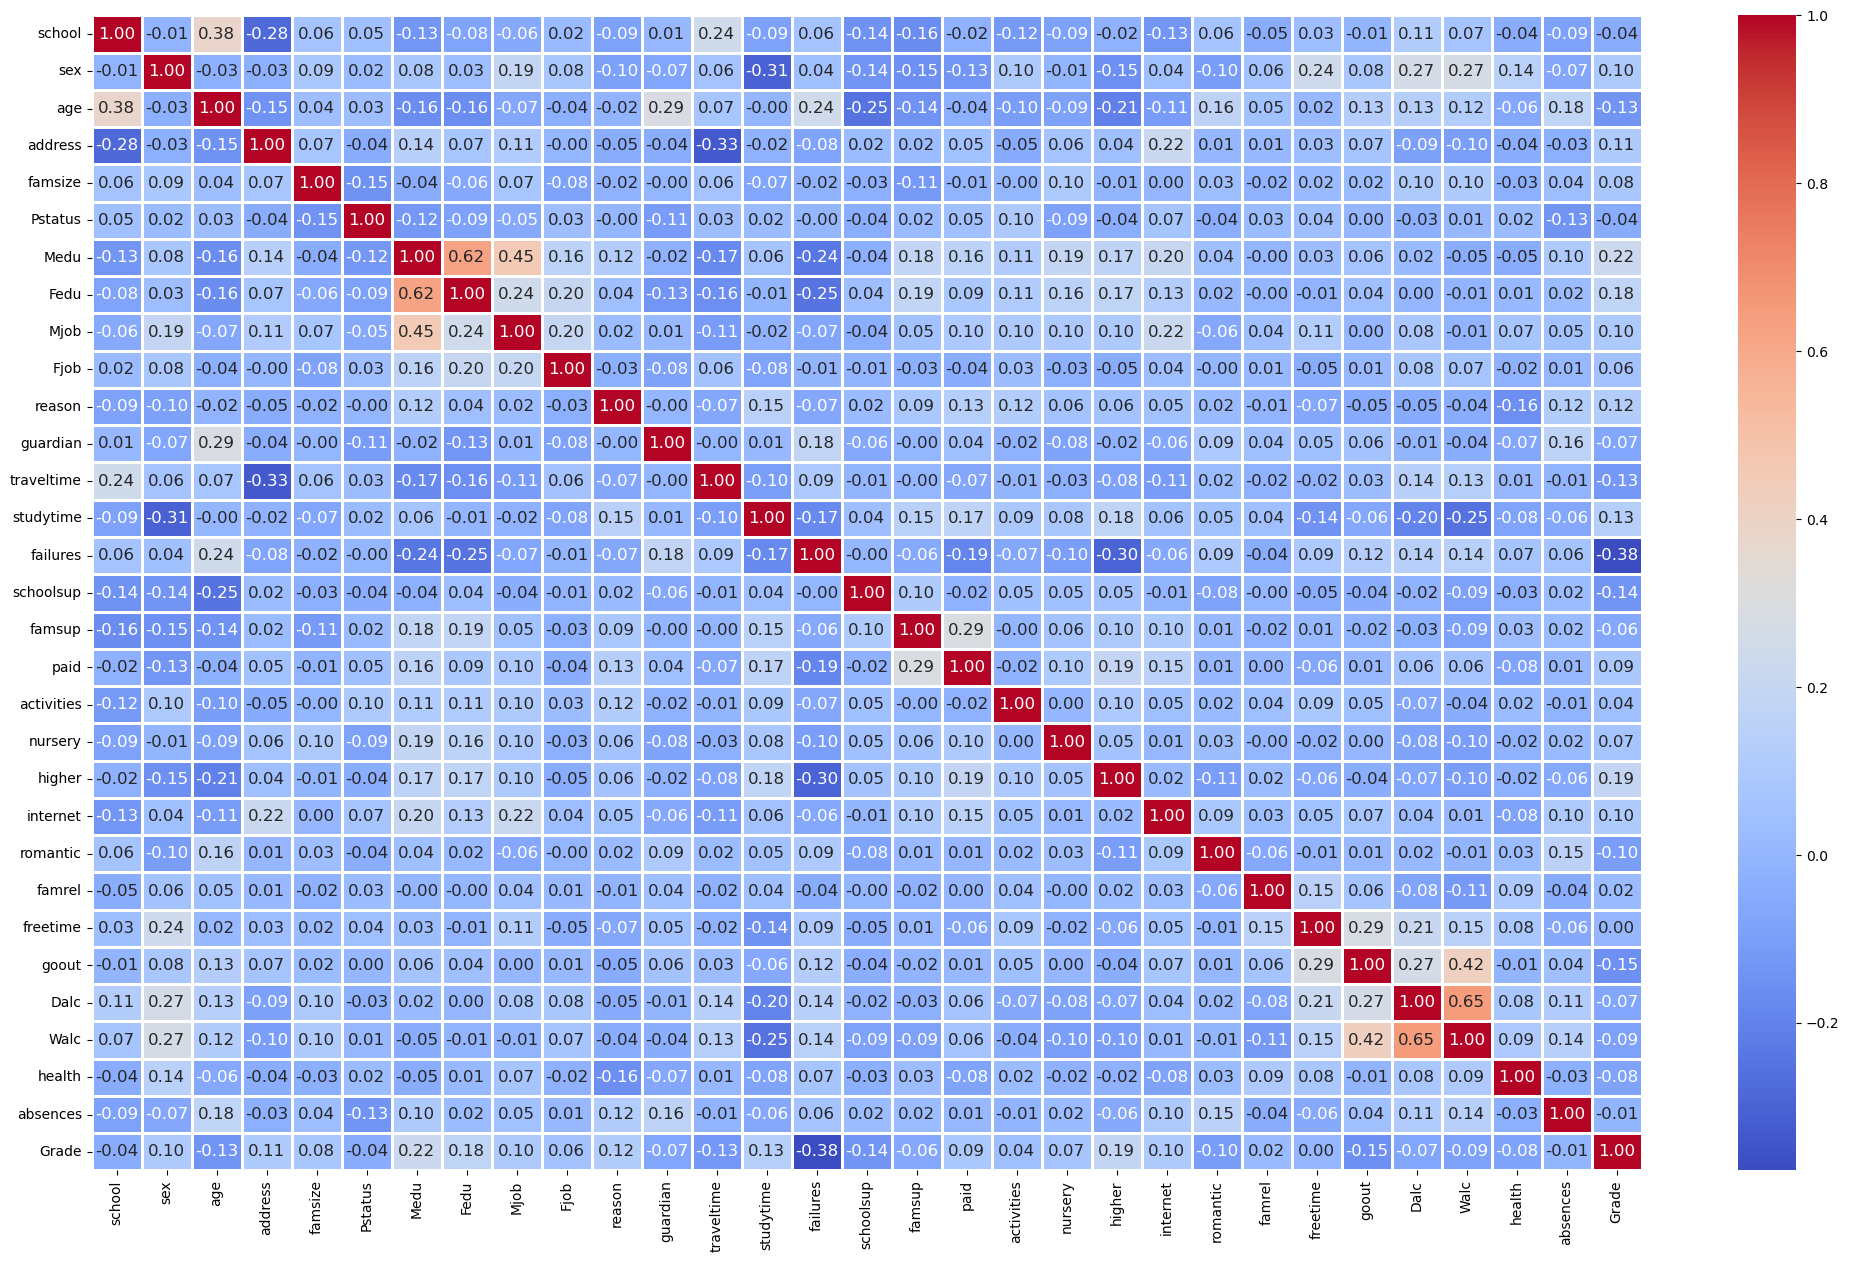

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm',fmt = ".2f",linewidths=2,annot_kws={"size": 12})
plt.show()


In [ ]:
target_column_name = 'Grade'
correlations = df2.corr()[target_column_name]
sorted_features = correlations.abs().sort_values(ascending=False)
correlation_threshold = 0.1
selected_features = sorted_features[sorted_features >= correlation_threshold].index.tolist()
print(selected_features[1:])

['failures', 'Medu', 'higher', 'Fedu', 'goout', 'schoolsup', 'age', 'studytime', 'traveltime', 'reason', 'address', 'romantic', 'internet', 'sex']


In [ ]:
from scipy.stats import ttest_ind

alpha = 0.05  # significance level

for feature in selected_features:
    _, p_value = ttest_ind(df2[feature], df2['Grade'])
    is_significant = p_value < alpha
    print(f"Feature: {feature}, p-value: {p_value}, Statistically Significant: {is_significant}")

Feature: Grade, p-value: 1.0, Statistically Significant: False
Feature: failures, p-value: 1.165530412755118e-269, Statistically Significant: True
Feature: Medu, p-value: 6.422795258103455e-197, Statistically Significant: True
Feature: higher, p-value: 4.555420550340291e-258, Statistically Significant: True
Feature: Fedu, p-value: 1.1039991524708936e-203, Statistically Significant: True
Feature: goout, p-value: 5.6438600582349554e-186, Statistically Significant: True
Feature: schoolsup, p-value: 2.686554044361484e-279, Statistically Significant: True
Feature: age, p-value: 5.277056691543705e-136, Statistically Significant: True
Feature: studytime, p-value: 1.1068910215423752e-221, Statistically Significant: True
Feature: traveltime, p-value: 3.3634128320494704e-240, Statistically Significant: True
Feature: reason, p-value: 5.803844022111339e-237, Statistically Significant: True
Feature: address, p-value: 1.5820238816581195e-261, Statistically Significant: True
Feature: romantic, p-valu

In [ ]:
x = df2[['failures', 'Medu', 'higher', 'Fedu', 'goout', 'schoolsup', 'age', 'studytime', 'traveltime', 'reason', 'address', 'romantic', 'internet', 'sex']]
y = df2['Grade']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=37)

In [ ]:
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

Intercept:  9.885774365061723
Coefficients:


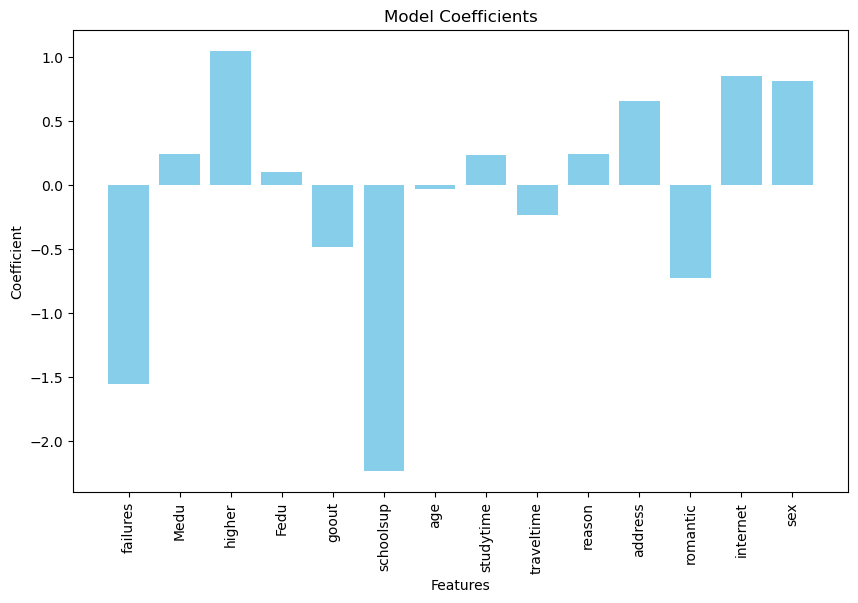

In [ ]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))
# Get the model coefficients
coefficients = mlr.coef_

# Create a bar plot of the coefficients
plt.figure(figsize=(10, 6))
plt.bar(x=x.columns, height=coefficients, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Model Coefficients')
plt.show()


In [ ]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [10.27751207  8.72401427 11.68475712 12.50554616  9.88760246 13.0924326
  4.95909354  8.23387415 12.01742907  4.12722004  9.52754547 12.98889284
 11.65898397 13.63819833 12.44088531 11.50510312 11.43123735 12.81780484
  9.338495   12.24167349 10.39820945 13.05986476 12.22336617 13.28785835
 12.0978856   5.13243987  8.6938358   8.59713179  3.11495414  9.06513597
 11.63439417  5.40348568 10.52445651 13.37591367  9.91095771  9.64567774
  9.11416011 11.76154746 10.64609974 10.6046486  11.32415178 12.5490033
 12.20309261 11.89488425 10.72919009  5.71849548 13.12617275  8.75557609
 11.31132143 11.09828747  9.19176052 13.02557368 12.45033266 11.60157092
  8.29786251  8.31278952 11.96709063 12.46890564 12.86983464  5.01321055
 11.5948025   9.33957441 12.55756217 13.01789336 10.69984492 11.57274902
 11.77506811  4.5733157   7.84478882 10.81009867  9.38007785 10.78614114
 11.17023769 12.13106419 11.57964695 11.89061702 11.95061443  8.09356165
  9.86104012  9.72321167  9.

In [ ]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
343,5.666667,10.277512
97,9.000000,8.724014
183,8.666667,11.684757
288,14.333333,12.505546
315,11.666667,9.887602


In [ ]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 23.44
Mean Absolute Error: 2.7379595764212237
Mean Square Error: 11.000794129991704
Root Mean Square Error: 3.3167445077955136


In [ ]:
import pandas as pd

# Create a dictionary to store the results
results = {'Variable': [], 'p-value': [], 'Statistically Significant': []}

# Iterate over each variable in the regression
for variable in selected_features[1:]:
    # Perform the t-test
    t_statistic, p_value = ttest_ind(x_train[variable], y_train)
    
    # Determine if the p-value is statistically significant
    is_significant = p_value < 0.05
    
    # Add the results to the dictionary
    results['Variable'].append(variable)
    results['p-value'].append(p_value)
    results['Statistically Significant'].append(is_significant)

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Display the table
print(results_df)
from scipy.stats import ttest_ind

# Iterate over each variable in the regression
for variable in selected_features[1:]:
    # Perform the t-test
    t_statistic, p_value = ttest_ind(x_train[variable], y_train)
    
    # Print the results
    print(f"Variable: {variable}")
    print(f"t-statistic: {t_statistic}")
    print(f"p-value: {p_value}")
    print("--------------------")


      Variable        p-value  Statistically Significant
0     failures  8.799246e-195                       True
1         Medu  2.452797e-142                       True
2       higher  1.570054e-185                       True
3         Fedu  7.085490e-146                       True
4        goout  1.503384e-136                       True
5    schoolsup  1.689823e-200                       True
6          age   1.693501e-92                       True
7    studytime  1.277271e-159                       True
8   traveltime  9.162192e-173                       True
9       reason  6.353636e-171                       True
10     address  7.271650e-188                       True
11    romantic  2.134720e-196                       True
12    internet  3.500607e-187                       True
13         sex  2.311342e-193                       True
Variable: failures
t-statistic: -47.00693250443814
p-value: 8.799245536753085e-195
--------------------
Variable: Medu
t-statistic: -35.062024263

<Axes: title={'center': 'Correlation With Grades'}>

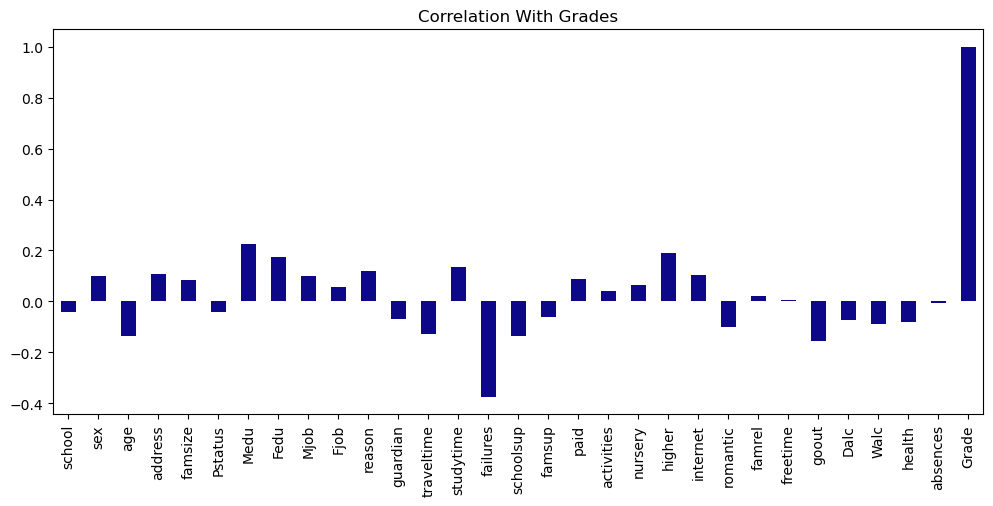

In [ ]:
df2.corrwith(df2['Grade']).plot.bar(
    title = 'Correlation With Grades', 
    figsize = (12, 5) , 
    cmap = 'plasma'
)

### Conclusive summary:

- All categorical features in the dataset provide insights regarding the test outcomes, and potentially, can be employed for testing causal inference and prediction of test scores.

- The distinct variable which provides highest information gain for assessing test scores is the 'lunch' variable, however, that is due to the fact that it is highly correlated with income.

- Girls tend to perform better than boys in reading and writing tests, while boys outperform in maths tests.

- Students with a preparatory course completed have a higher chance in getting a higher grade rather than students who have not attended it.

- The data tells us that higher parental education is associated with higher grades.

- Test scores, as assumed in the theoretical world, tend to follow a normal distribution, which can be slightly observed in our example as well. However, it is worth noting that we have only 1000 examples, and if we increase it, according to CLT we should observe a perfect normal distribution.

- Test scores are highly correlated with each other, especially reading and writing scores, while maths is not as much.